# <center>IMDB Rating Prediction</center>

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
df.shape

(5043, 28)

## Checking for Null values in the dataset

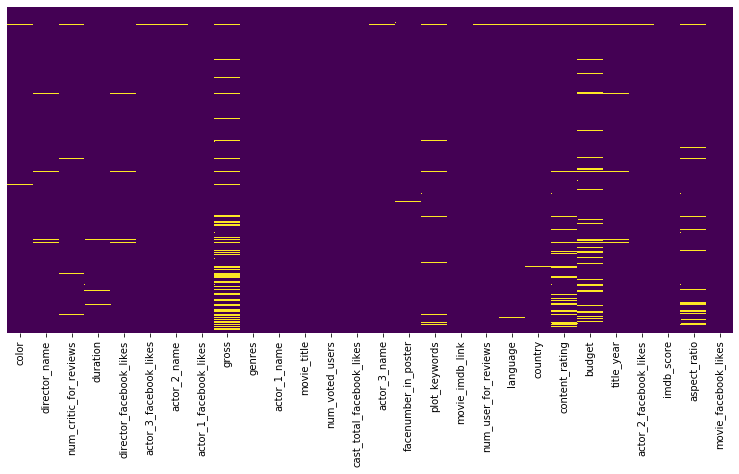

In [5]:
plt.figure(figsize=(13,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [6]:
df['imdb_score'].sort_values()

2834    1.6
1136    1.7
2295    1.9
4605    1.9
2268    1.9
       ... 
4409    9.1
3207    9.1
3466    9.2
1937    9.3
2765    9.5
Name: imdb_score, Length: 5043, dtype: float64

In [7]:
df[df['imdb_score']==1.6]['movie_title']

2834    Justin Bieber: Never Say Never 
Name: movie_title, dtype: object

Movie with the lowest Imdb rating is Documentary 'Justin Bieber: Never Say Never'

In [8]:
df[df['imdb_score']==9.5]['movie_title']

2765    Towering Inferno             
Name: movie_title, dtype: object

Movie with the highest Imdb rating is Comedy 'Towering Inferno'

### Creating a histogram of all the features in dataframe.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242BA60F988>,
      dtype=object)

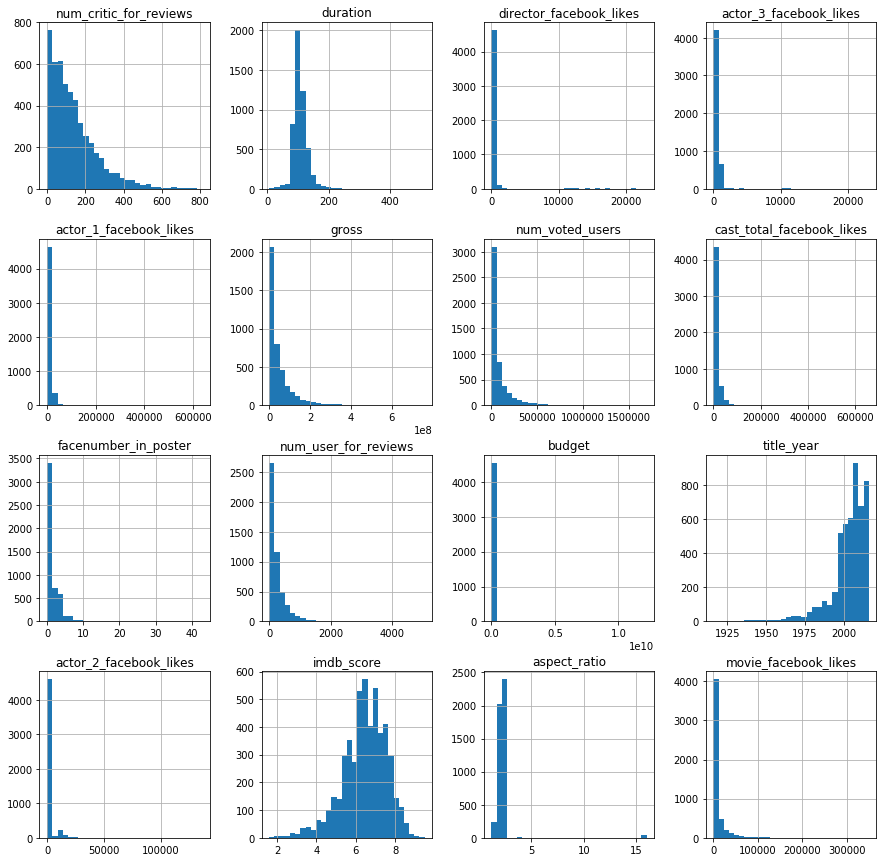

In [9]:
df.hist(bins=30,figsize=(15,15))

### Creating a new column in the dataframe which shows the number of different genres a movie has.

In [10]:
df['genres_num'] = df['genres'].apply(lambda x: len(x.split('|')))

In [11]:
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,3


In [12]:
df['genres_num'].max()

8

In [13]:
df[df['genres_num']==8]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num
902,Color,Don Bluth,78.0,94.0,383.0,753.0,Kelsey Grammer,4000.0,58297830.0,Adventure|Animation|Drama|Family|Fantasy|Music...,...,English,USA,G,50000000.0,1997.0,808.0,7.1,2.35,0,8
1387,Color,John Frankenheimer,126.0,124.0,287.0,475.0,James Frain,9000.0,23360779.0,Action|Adventure|Crime|Drama|Family|Fantasy|Ro...,...,English,USA,R,34000000.0,2000.0,1000.0,5.7,2.35,852,8
2340,Color,Kevin Munroe,138.0,107.0,14.0,311.0,Laura Spencer,403.0,1183354.0,Action|Comedy|Crime|Fantasy|Horror|Mystery|Sci...,...,English,USA,PG-13,20000000.0,2010.0,368.0,5.1,2.35,0,8
3539,NaN,Richard Rich,2.0,45.0,24.0,29.0,Kate Higgins,122.0,NaN,Action|Adventure|Animation|Comedy|Drama|Family...,...,NaN,USA,NaN,7000000.0,2014.0,35.0,6.0,NaN,41,8


### Creating a new column in the dataframe which shows only the first genre type of a movie. This will help to sort the movies on single genre type.

In [14]:
df['genres_first'] = df['genres'].apply(lambda x: x.split('|')[0] if '|' in x else x)

In [15]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num,genres_first
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,3,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,3,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,2,Action
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,1,Documentary


### Analysing which movie genre has the best imdb score.

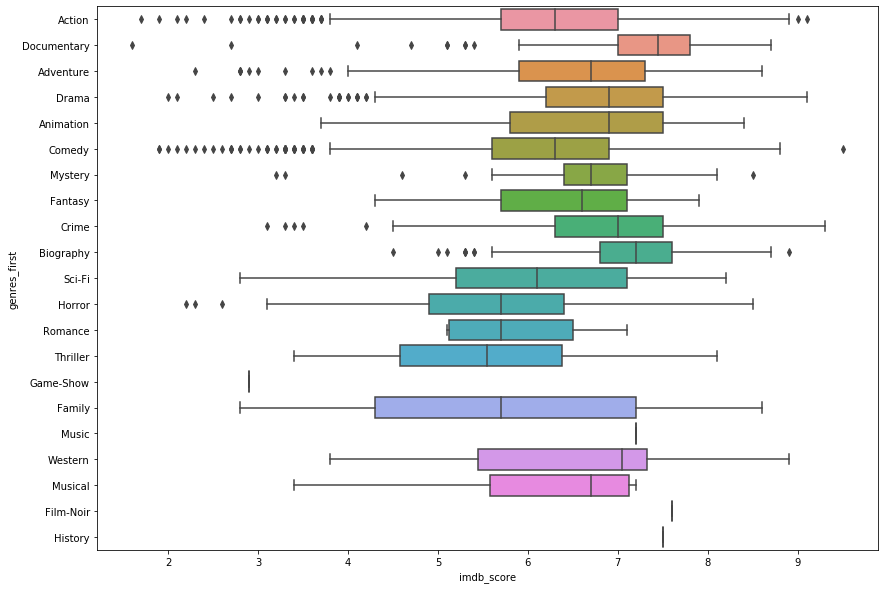

In [16]:
plt.figure(figsize=(14,10))
sns.boxplot(x='imdb_score',y='genres_first',data=df)

From the graph it's clear that Documentaries are rated highest on Imdb whereas Thriller are least rated

### Finding which numerical features have the most influence on Imdb score.

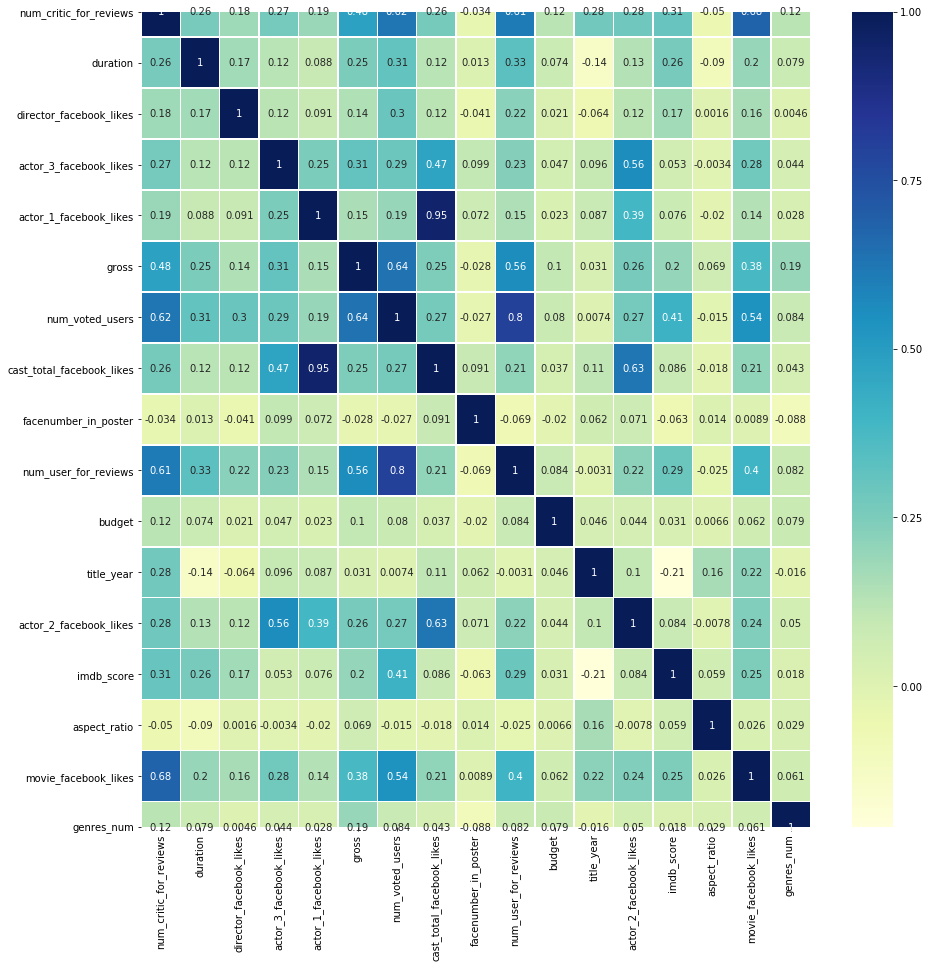

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.5)

### Number of movies released every year.

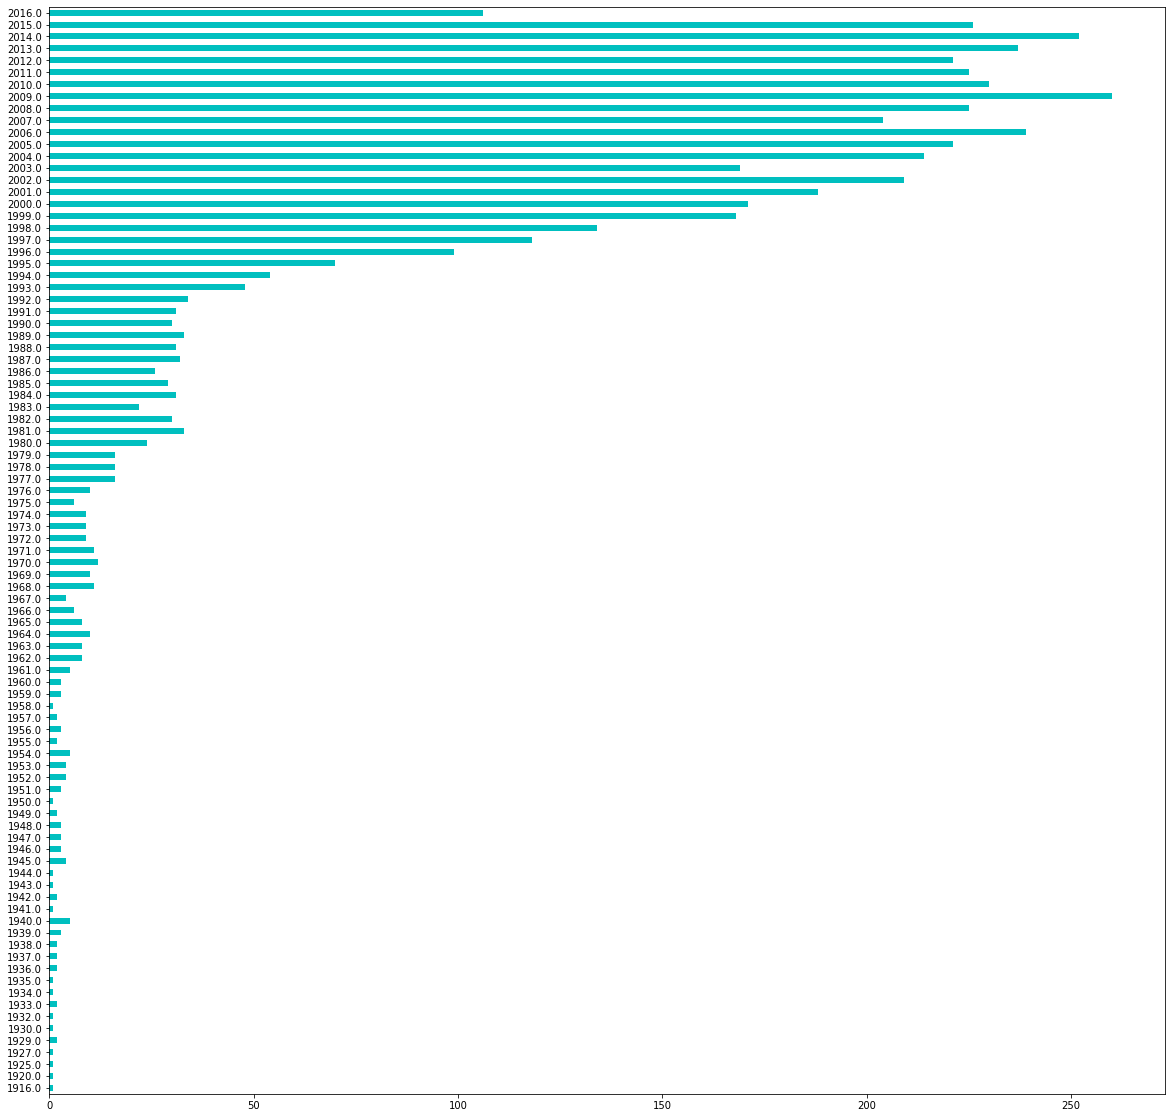

In [18]:
df.title_year.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(20,20),color='c')

### Number of movies as per different genre type.

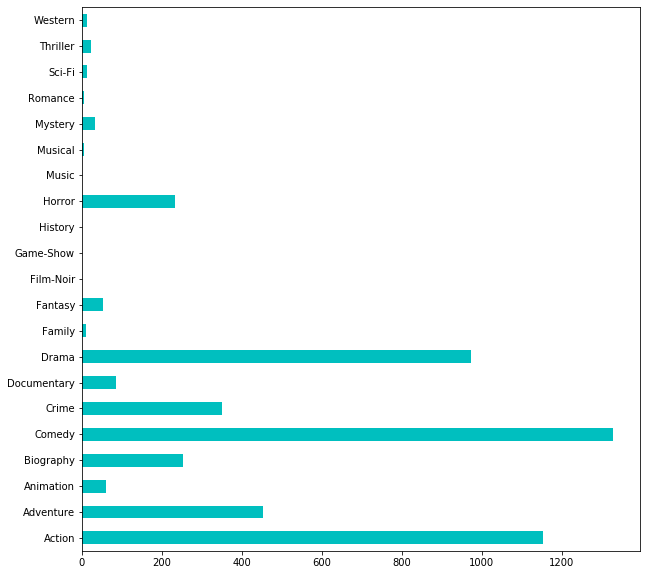

In [19]:
df.genres_first.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(10,10),color='c')

### Number of movies as per countries.

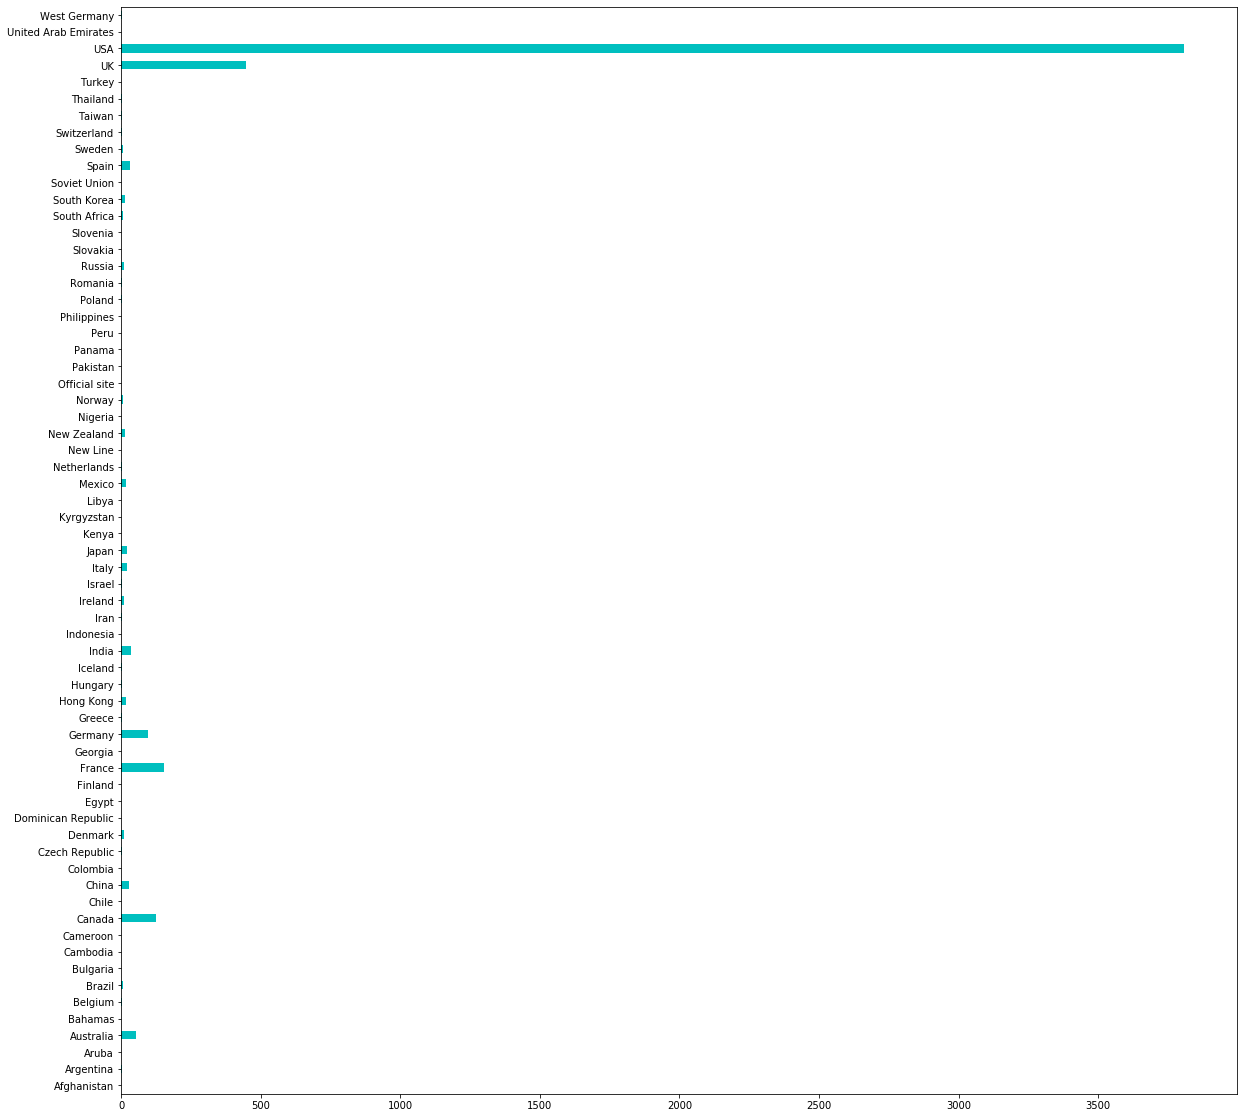

In [20]:
df.country.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(20,20),color='c')

### Maikng a pivot table to find the average imdb score for different movie genre.

In [21]:
pd.pivot_table(df,index='genres_first', values='imdb_score').sort_values('imdb_score', ascending = False)

,imdb_score
genres_first,
Film-Noir,7.600000
History,7.500000
Music,7.200000
Documentary,7.167857
Biography,7.159127
Crime,6.906877
Drama,6.767181
Animation,6.631148
Western,6.583333


## Simple function to get the name of most correlated attributes

In [22]:
def correlated_col(cor_data, threshold):
    #cor_data to be column along which corelation to be measured
    #threshold be the value above which of correlation to be considered
    feature=[]
    value=[]
    
    for i, index in enumerate(cor_data.index):
        if abs(cor_data[index]) > threshold:
            feature.append(index)
            value.append(cor_data[index])
    
    df2 = pd.DataFrame(data=value, index = feature, columns= ['corr value'])
    return df2

In [23]:
top_correlated_value = correlated_col(df.corr()['imdb_score'], 0.2)
top_correlated_value

,corr value
num_critic_for_reviews,0.305303
duration,0.261662
num_voted_users,0.410965
num_user_for_reviews,0.292475
title_year,-0.209167
imdb_score,1.000000
movie_facebook_likes,0.247049


In [24]:
final_df = df[top_correlated_value.index]
final_df.head()

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes
0,723.0,178.0,886204,3054.0,2009.0,7.9,33000
1,302.0,169.0,471220,1238.0,2007.0,7.1,0
2,602.0,148.0,275868,994.0,2015.0,6.8,85000
3,813.0,164.0,1144337,2701.0,2012.0,8.5,164000
4,NaN,NaN,8,NaN,NaN,7.1,0


### Working on columns with dtype of object

In [25]:
cat_df = df.select_dtypes(include=['object'])
cat_df.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,genres_first
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,Action
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,Action
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,Action
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,Action
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,Documentary


#### Changing categorical values(Object) into numerical value using Encoder

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
cat_col = cat_df.columns
for i in cat_col:
    le = LabelEncoder()
    cat_df[i] = le.fit_transform(cat_df[i].astype('str'))

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
cat_df.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,genres_first
0,1,922,1405,106,264,396,3437,1318,2964,11,62,7,0
1,1,794,2216,100,976,2725,1390,4281,2720,11,62,7,0
2,1,2021,2487,127,349,3274,3129,2078,4532,11,61,7,0
3,1,373,532,287,1963,3705,1763,3482,3755,11,62,7,0
4,2,600,2431,753,522,3327,3518,4675,4917,47,65,18,6


In [29]:
for x in cat_df.columns:
    print(x, ' ', len(cat_df[x].value_counts()))

color   3
director_name   2399
actor_2_name   3033
genres   914
actor_1_name   2098
movie_title   4917
actor_3_name   3522
plot_keywords   4761
movie_imdb_link   4919
language   48
country   66
content_rating   19
genres_first   21


In [30]:
# Adding target column in the cat_df to get the correlation
cat_df['imdb_score'] = df['imdb_score']

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
cat_df.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,genres_first,imdb_score
0,1,922,1405,106,264,396,3437,1318,2964,11,62,7,0,7.9
1,1,794,2216,100,976,2725,1390,4281,2720,11,62,7,0,7.1
2,1,2021,2487,127,349,3274,3129,2078,4532,11,61,7,0,6.8
3,1,373,532,287,1963,3705,1763,3482,3755,11,62,7,0,8.5
4,2,600,2431,753,522,3327,3518,4675,4917,47,65,18,6,7.1


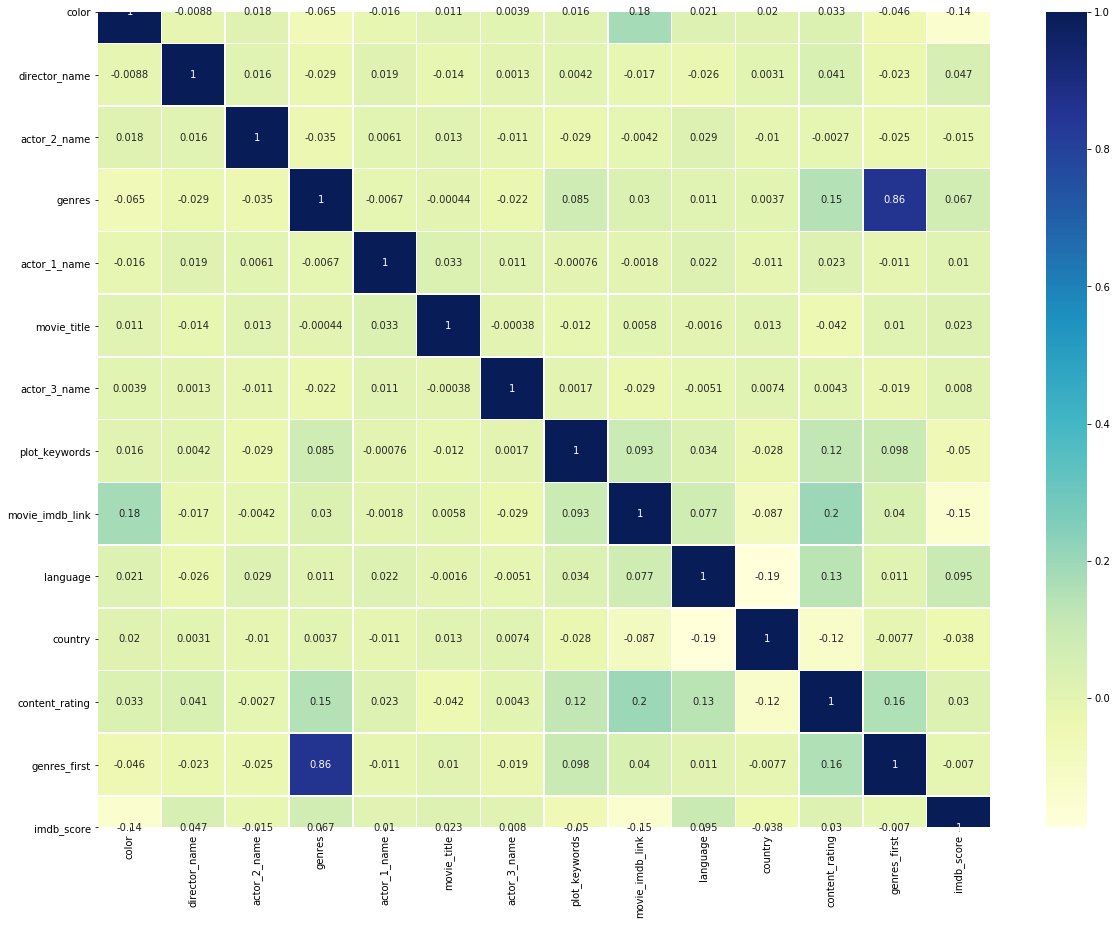

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(cat_df.corr(), annot = True, cmap="YlGnBu", linewidths=.5)

In [33]:
#Adding correlated attribute to final_df
final_df['color'] = cat_df['color']
final_df['director_name'] = cat_df['director_name']
final_df['genres'] = cat_df['genres']
final_df['language'] = cat_df['language']

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [34]:
final_df.head()

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes,color,director_name,genres,language
0,723.0,178.0,886204,3054.0,2009.0,7.9,33000,1,922,106,11
1,302.0,169.0,471220,1238.0,2007.0,7.1,0,1,794,100,11
2,602.0,148.0,275868,994.0,2015.0,6.8,85000,1,2021,127,11
3,813.0,164.0,1144337,2701.0,2012.0,8.5,164000,1,373,287,11
4,NaN,NaN,8,NaN,NaN,7.1,0,2,600,753,47


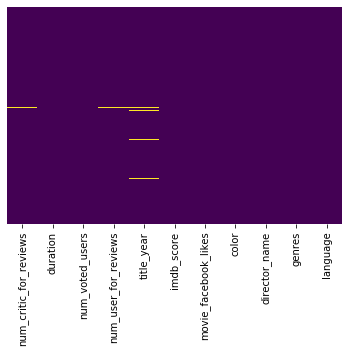

In [35]:
sns.heatmap(final_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [36]:
final_df.isnull().sum()

num_critic_for_reviews     50
duration                   15
num_voted_users             0
num_user_for_reviews       21
title_year                108
imdb_score                  0
movie_facebook_likes        0
color                       0
director_name               0
genres                      0
language                    0
dtype: int64

In [37]:
final_df['num_critic_for_reviews'] = final_df['num_critic_for_reviews'].fillna(final_df['num_critic_for_reviews'].mean())
final_df['duration'] = final_df['duration'].fillna(final_df['duration'].mean())
final_df['num_user_for_reviews'] = final_df['num_user_for_reviews'].fillna(final_df['num_user_for_reviews'].mean())
final_df['title_year'] = final_df['title_year'].fillna(final_df['title_year'].mean())

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [38]:
final_df.isnull().sum()

num_critic_for_reviews    0
duration                  0
num_voted_users           0
num_user_for_reviews      0
title_year                0
imdb_score                0
movie_facebook_likes      0
color                     0
director_name             0
genres                    0
language                  0
dtype: int64

In [39]:
X = final_df.drop(['imdb_score'], axis=1)
y = final_df['imdb_score']

In [40]:
X.shape, y.shape

((5043, 10), (5043,))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Using the Linear Regression model for predicting the imdb score.

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lr_pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 0.7120393484929429
Mean Squared Error: 0.9066032678353348
Root Mean Squared Error: 0.9521571655117315


## Using the Random Forest model for predicting the the imdb score.

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

C:\Users\Rahul Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
rf_pred = rf.predict(X_test)

In [47]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 0.6175677461996034
Mean Squared Error: 0.7130655651024456
Root Mean Squared Error: 0.8444320962057551
